# About Dataset
House Price Prediction Challenge

## Overview

Welcome to the House Price Prediction Challenge, you will test your regression skills by designing an algorithm to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India.

## Attributes Description:
Column 	Description
POSTED_BY 	Category marking who has listed the property
UNDER_CONSTRUCTION 	Under Construction or Not
RERA 	Rera approved or Not
BHK_NO 	Number of Rooms
BHK_OR_RK 	Type of property
SQUARE_FT 	Total area of the house in square feet
READY_TO_MOVE 	Category marking Ready to move or Not
RESALE 	Category marking Resale or not
ADDRESS 	Address of the property
LONGITUDE 	Longitude of the property
LATITUDE 	Latitude of the property





### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import tensorflow as tf

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
train_df.shape

(29451, 12)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
train_df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [7]:
train_df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [8]:
train_df['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

In [9]:
train_df['UNDER_CONSTRUCTION'].value_counts()

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64

In [10]:
train_df['RERA'].value_counts()

0    20088
1     9363
Name: RERA, dtype: int64

### Data Visualization

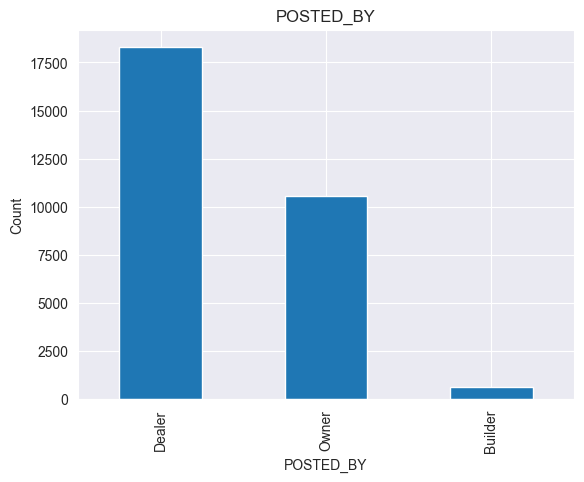

In [11]:
train_df["POSTED_BY"].value_counts().plot(kind='bar')
plt.title("POSTED_BY")
plt.xlabel("POSTED_BY")
plt.ylabel("Count")
plt.show()


### Which is the most common house (Bedroom wise) ?

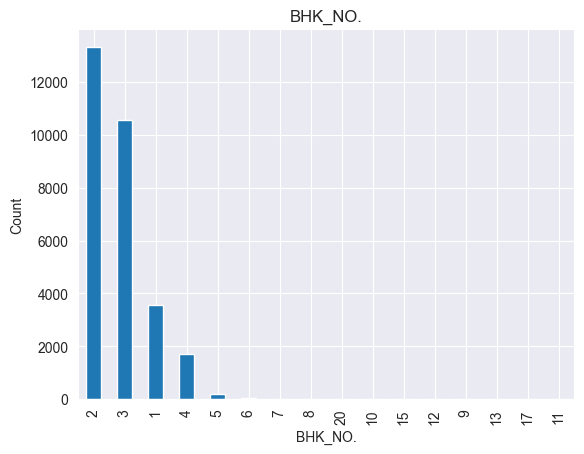

In [12]:
train_df["BHK_NO."].value_counts().plot(kind='bar')
plt.title("BHK_NO.")
plt.xlabel("BHK_NO.")
plt.ylabel("Count")
plt.show()

### Visualizing the location of the houses based on latitude and longitude.

<Figure size 1000x1000 with 0 Axes>

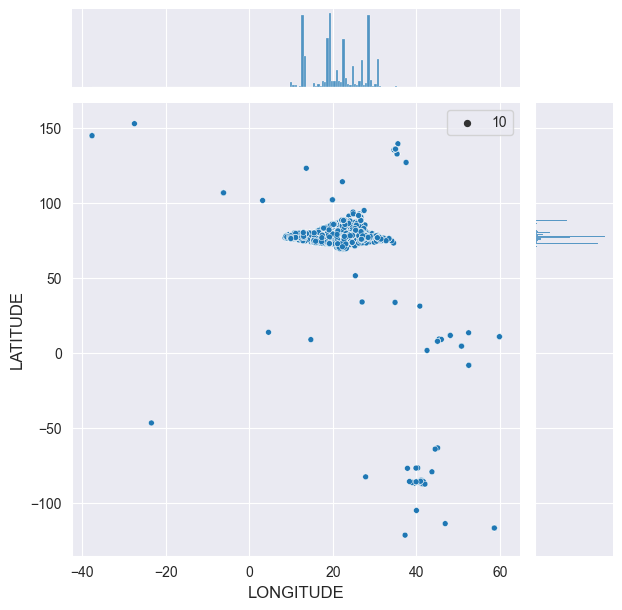

In [13]:
plt.figure(figsize=(10,10))
sns.jointplot(x=train_df['LONGITUDE'].values, y=train_df['LATITUDE'].values, size=10)
plt.ylabel('LATITUDE', fontsize=12)
plt.xlabel('LONGITUDE', fontsize=12)
plt.show()

### How common factors are affecting the price of the houses ?

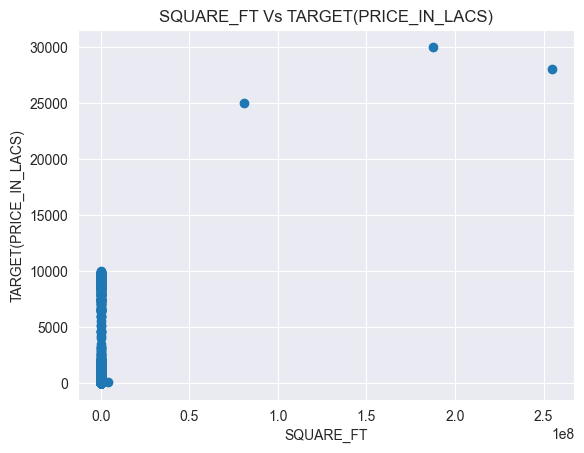

In [14]:
plt.scatter(train_df['SQUARE_FT'], train_df['TARGET(PRICE_IN_LACS)'])
plt.title("SQUARE_FT Vs TARGET(PRICE_IN_LACS)")
plt.xlabel("SQUARE_FT")
plt.ylabel("TARGET(PRICE_IN_LACS)")
plt.show()

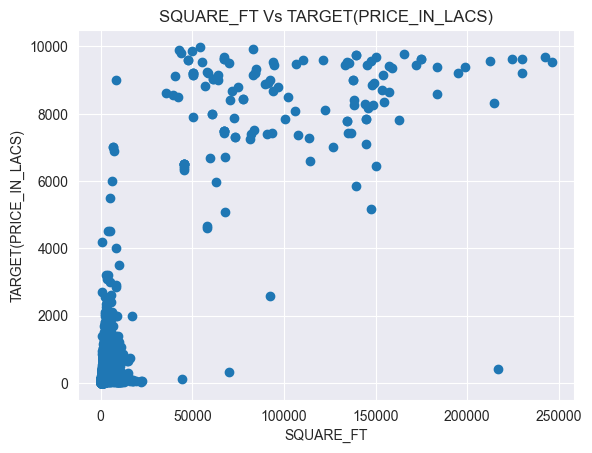

In [15]:
# Deleting the outliers
train_df_rm = train_df[train_df['SQUARE_FT'] / train_df['TARGET(PRICE_IN_LACS)'] < 1000]
plt.scatter(train_df_rm['SQUARE_FT'], train_df_rm['TARGET(PRICE_IN_LACS)'])
plt.title("SQUARE_FT Vs TARGET(PRICE_IN_LACS)")
plt.xlabel("SQUARE_FT")
plt.ylabel("TARGET(PRICE_IN_LACS)")
plt.show()

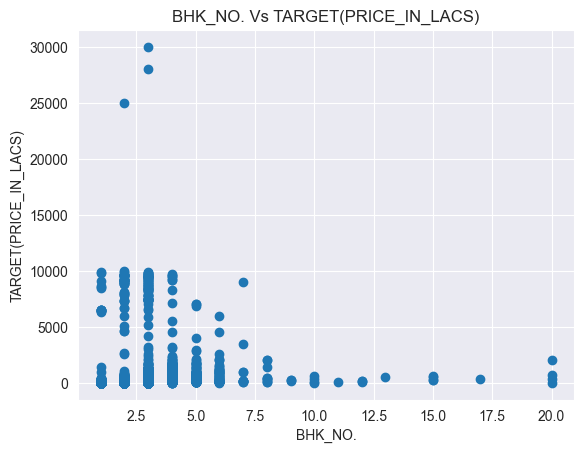

In [16]:
plt.scatter(train_df['BHK_NO.'], train_df['TARGET(PRICE_IN_LACS)'])
plt.title("BHK_NO. Vs TARGET(PRICE_IN_LACS)")
plt.xlabel("BHK_NO.")
plt.ylabel("TARGET(PRICE_IN_LACS)")
plt.show()

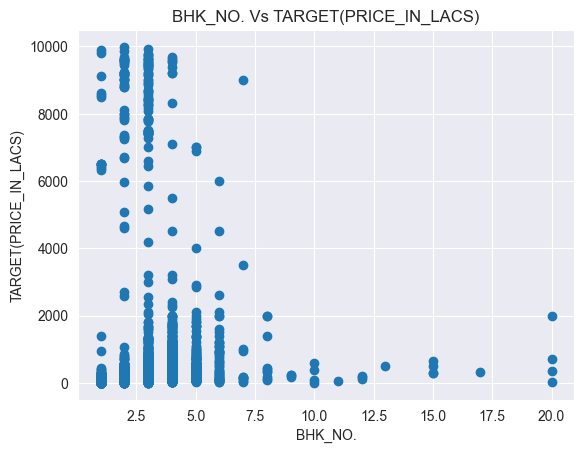

In [17]:
# Deleting the outliers
train_df_rm = train_df[train_df['TARGET(PRICE_IN_LACS)'] < 20000]
plt.scatter(train_df_rm['BHK_NO.'], train_df_rm['TARGET(PRICE_IN_LACS)'])
plt.title("BHK_NO. Vs TARGET(PRICE_IN_LACS)")
plt.xlabel("BHK_NO.")
plt.ylabel("TARGET(PRICE_IN_LACS)")
plt.show()

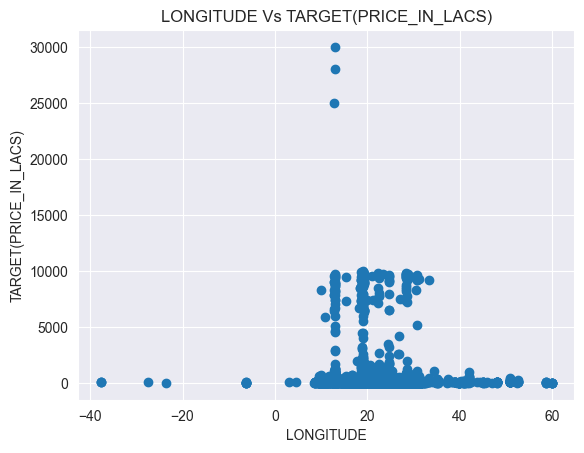

In [18]:
plt.scatter(train_df['LONGITUDE'], train_df['TARGET(PRICE_IN_LACS)'])
plt.title("LONGITUDE Vs TARGET(PRICE_IN_LACS)")
plt.xlabel("LONGITUDE")
plt.ylabel("TARGET(PRICE_IN_LACS)")
plt.show()

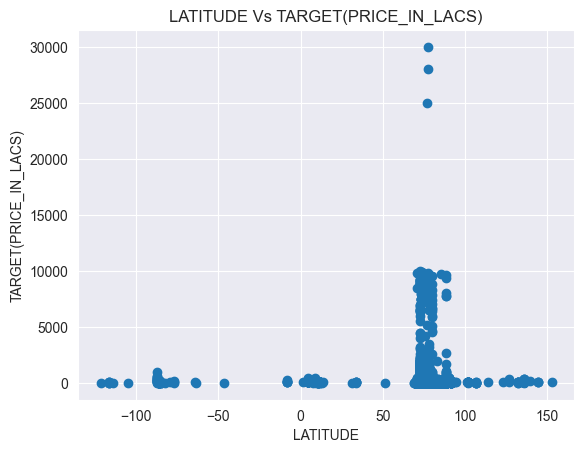

In [19]:
plt.scatter(train_df['LATITUDE'], train_df['TARGET(PRICE_IN_LACS)'])
plt.title("LATITUDE Vs TARGET(PRICE_IN_LACS)")
plt.xlabel("LATITUDE")
plt.ylabel("TARGET(PRICE_IN_LACS)")
plt.show()

### Correlation Matrix

C:\Users\wmigu\AppData\Local\Temp\ipykernel_7096\1312844681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


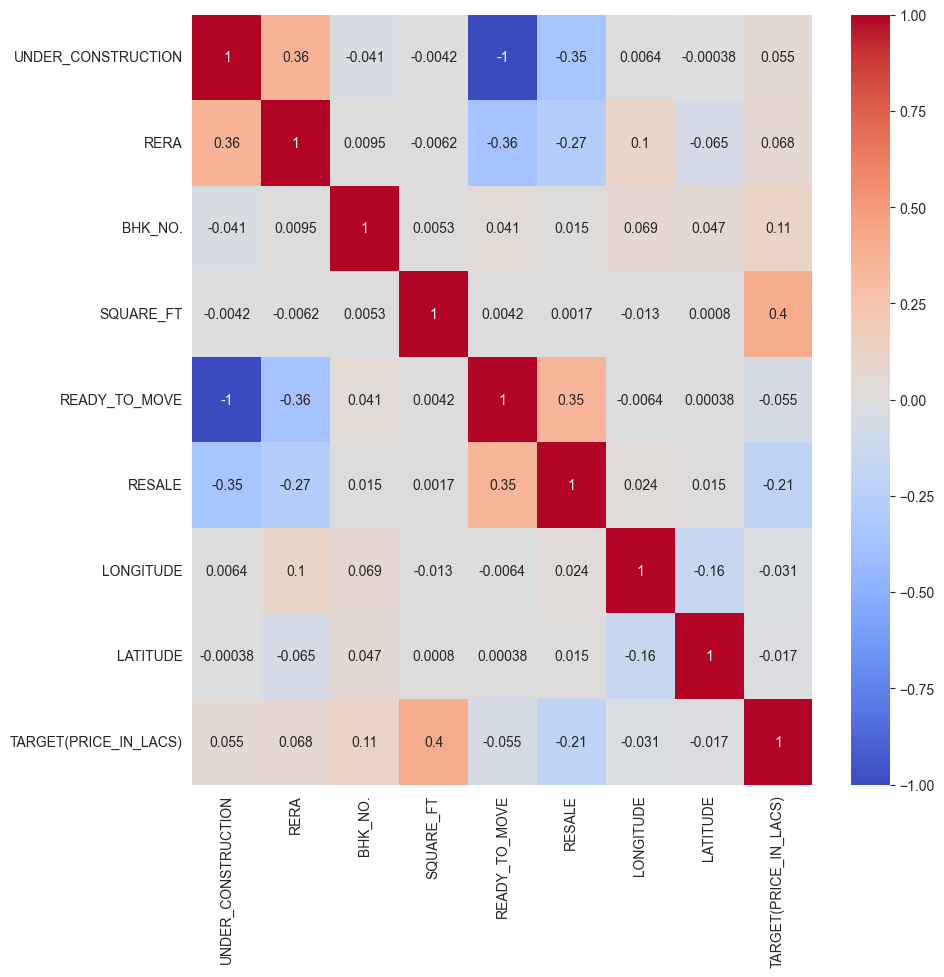

In [20]:
corr = train_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [21]:
corr['TARGET(PRICE_IN_LACS)'].sort_values(ascending=False)

TARGET(PRICE_IN_LACS)    1.000000
SQUARE_FT                0.402685
BHK_NO.                  0.112283
RERA                     0.067636
UNDER_CONSTRUCTION       0.055399
LATITUDE                -0.017254
LONGITUDE               -0.031112
READY_TO_MOVE           -0.055399
RESALE                  -0.207378
Name: TARGET(PRICE_IN_LACS), dtype: float64

### Data Preprocessing

In [22]:
train_df.drop(['ADDRESS'], axis=1, inplace=True)
test_df.drop(['ADDRESS'], axis=1, inplace=True)

train_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,22.592200,88.484911,60.5


In [23]:
train_df['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

In [24]:
train_df['POSTED_BY'] = train_df['POSTED_BY'].map({'Owner': 0, 'Dealer': 1, 'Builder': 2})
test_df['POSTED_BY'] = test_df['POSTED_BY'].map({'Owner': 0, 'Dealer': 1, 'Builder': 2})


In [25]:
train_df['BHK_OR_RK'].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [26]:
train_df['BHK_OR_RK'] = train_df['BHK_OR_RK'].map({'BHK': 0, 'RK': 1})
test_df['BHK_OR_RK'] = test_df['BHK_OR_RK'].map({'BHK': 0, 'RK': 1})


In [27]:
train_df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,0,0,0,2,0,1300.236407,1,1,12.969910,77.597960,55.0
1,1,0,0,2,0,1275.000000,1,1,12.274538,76.644605,51.0
2,0,0,0,2,0,933.159722,1,1,12.778033,77.632191,43.0
3,0,0,1,2,0,929.921143,1,1,28.642300,77.344500,62.5
4,1,1,0,2,0,999.009247,0,1,22.592200,88.484911,60.5


### Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()

### Splitting the data into training and testing sets

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(train_df.drop(['TARGET(PRICE_IN_LACS)'], axis=1), train_df['TARGET(PRICE_IN_LACS)'], test_size=0.2, random_state=42)
X_train

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
20898,1,1,0,2,0,709.113608,0,1,22.486964,88.313191
28923,0,0,0,3,0,1800.370665,1,1,27.400000,82.960000
12216,1,1,1,6,0,3280.182232,0,1,24.690280,78.418890
6216,1,0,0,3,0,2573.588548,1,1,28.522931,77.357078
22404,0,0,0,2,0,900.109770,1,1,23.166495,72.634290
...,...,...,...,...,...,...,...,...,...,...
21575,1,0,0,3,0,2026.085855,1,1,28.919600,76.897200
5390,1,1,0,3,0,1180.000000,0,0,22.550000,88.383300
860,1,1,1,2,0,1267.719258,0,1,18.097689,74.735239
15795,0,0,0,3,0,1302.378256,1,1,20.860239,81.285753


In [33]:
y_train

20898     28.4
28923     68.0
12216    360.0
6216     160.0
22404     41.0
         ...  
21575    160.0
5390      59.0
860      110.0
15795     23.0
23654     49.9
Name: TARGET(PRICE_IN_LACS), Length: 23560, dtype: float64

In [34]:
reg.fit(X_train, y_train)

LinearRegression()

In [35]:
reg.score(X_test, y_test)

0.4018852754432065

In [46]:
predict_linear = reg.predict(test_df)
predict_linear

array([-28.29527504, 619.93941792,  56.26748895, ..., 537.27554183,
        92.0490012 , 176.78263769])

### Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rf = RandomForestRegressor()

In [49]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [50]:
rf.score(X_test, y_test)

0.7212407487046417

In [54]:
predict_rfr = rf.predict(test_df)
print(predict_rfr)

[  20.434        77.312        69.317      ... 8662.5          87.042
  637.83333333]


In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
scores = cross_val_score(rf, X_train, y_train, cv=10)
print(scores)

[0.97149534 0.91583509 0.98497711 0.93665465 0.93354032 0.95264319
 0.96485539 0.96175167 0.96707653 0.46194279]


In [57]:
scores.mean()

0.9050772070057688

In [58]:
scores.std()

0.14898938124482772

### gradient boosting regression

In [59]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
gbr = GradientBoostingRegressor()

In [61]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [62]:
gbr.score(X_test, y_test)

0.7790847478716395

In [63]:
predict_gbr = gbr.predict(test_df)
print(predict_gbr)

[  15.24160741   65.54939484   61.05668386 ... 8219.90334877   80.41093307
  476.66401371]


In [64]:
scores = cross_val_score(gbr, X_train, y_train, cv=10)
print(scores)

[0.94934801 0.90987361 0.98062959 0.93465908 0.95069972 0.93869221
 0.94885025 0.96699311 0.96154261 0.48788373]


In [65]:
scores.mean()

0.9029171908717728

In [66]:
scores.std()

0.13954184957725604

### Comparing the results

In [68]:
from sklearn.metrics import mean_squared_error

In [70]:
print('Linear Regression: ', predict_linear)
print('Random Forest Regressor: ', predict_rfr)
print('Gradient Boosting Regressor: ', predict_gbr)

Linear Regression:  [-28.29527504 619.93941792  56.26748895 ... 537.27554183  92.0490012
 176.78263769]
Random Forest Regressor:  [  20.434        77.312        69.317      ... 8662.5          87.042
  637.83333333]
Gradient Boosting Regressor:  [  15.24160741   65.54939484   61.05668386 ... 8219.90334877   80.41093307
  476.66401371]


In [71]:
print('Linear Regression: ', mean_squared_error(y_test, reg.predict(X_test)))
print('Random Forest Regressor: ', mean_squared_error(y_test, rf.predict(X_test)))
print('Gradient Boosting Regressor: ', mean_squared_error(y_test, gbr.predict(X_test)))


Linear Regression:  325893.04552218586
Random Forest Regressor:  151886.74955201248
Gradient Boosting Regressor:  120369.45649810154
